<a href="https://colab.research.google.com/github/safi50/Titanic-Survivor-Prediction/blob/main/Titanic_Survivor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COLUMN Details:

- sibsp ==> counter for siblings, spouse etc  on board. more sibs + spouse  = counter + 1

- parch ==> same as sibsp but for relations parents , children --> counter + 1


In [ ]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset Details

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Corelation Heatmap

<ipython-input-128-183b09ae440d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "coolwarm")


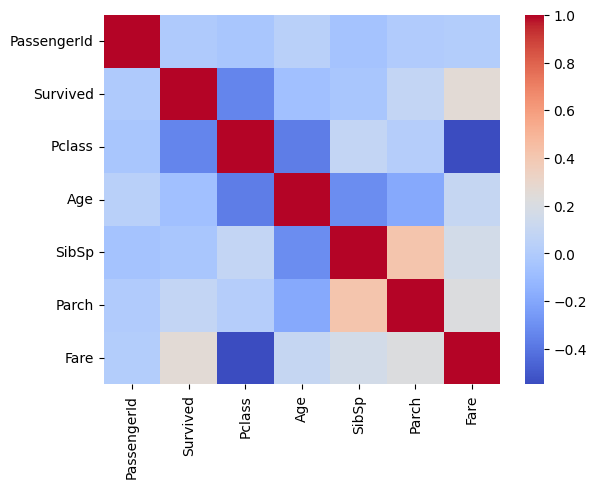

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(), cmap = "coolwarm")
plt.show()

### Stratified Shuffle Split : Shuffle the dataset and have similar distributions of important features in our both training and test set.

- We can choose features of which equal distributions that we want.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size  = 0.2)

for train_indices, test_indices in split.split(data, data[["Survived", "Pclass", "Sex"]]):
  train_set = data.loc[train_indices]
  test_set = data.loc[test_indices]

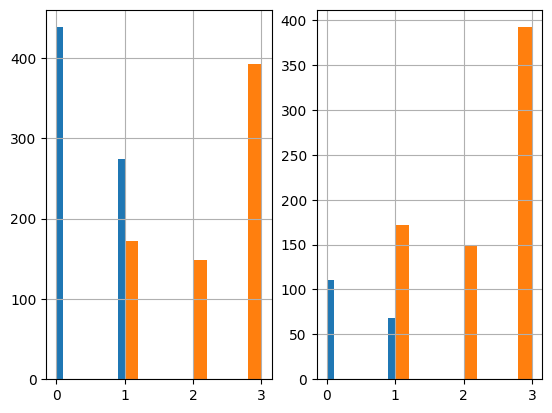

In [ ]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
train_set['Pclass'].hist()

plt.show()

In [ ]:
len(train_set), len(test_set)

(712, 179)

### Handling Missing Values

In [ ]:
# To check if we have any Missing Values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 525 to 364
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


- Handling Missing Values of Age and Dropping other non necessary features

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self, X , y = None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy = "mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X


In [ ]:
### Coverting Textual features into Numerical columnns via Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class FeatureEncoder(BaseEstimator, TransformerMixin):

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()


    # Converting Textual 'Embarked' Columnn into Numeric Binary Columns
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    #Possible columns names of Embarked Column
    column_names = ["C", "S", "Q", "N"]
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]



    # Converting Textual 'Sex' Columnn into Numeric Binary Columns
    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    #Possible columns names of Embarked Column
    column_names = ["Male", "Female"]
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X

### Dropping Features

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self

  def transform(self, X):
    #dropping unnecessary columns and ignoring errors in case of missing columns
    return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")


### Making a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                      ("ageImputer", AgeImputer()),
                      ("featureEncoder", FeatureEncoder()),
                      ("featureDropper", FeatureDropper())
                    ])

In [ ]:
# Running Data through Pipeline to Clean it

clean_train_set = pipeline.fit_transform(train_set)
clean_test_set = pipeline.fit_transform(test_set)


Analyzing Clean Data

In [ ]:
clean_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 525 to 364
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


- We can see that all the values now are not null

### Scaling Data For Efficient Traning

In [ ]:
from sklearn.preprocessing import StandardScaler

y = clean_train_set['Survived']
X = clean_train_set.drop(['Survived'], axis = 1)

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = y.to_numpy()

# Model Training - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# divide data into multiple folds and tests them on differennt folds and finds optimal hyperparameters
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = [
    {
      "n_estimators": [10, 100, 250, 500, 1000],
      "max_depth": [None, 2, 5, 10],
      "min_samples_split": [2,3,4,]
    }]



In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 2, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 250, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

- Select the Best Option - Estimator - With Best Hyperparams

In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(max_depth=10, n_estimators=10)

### Making Predictions

In [ ]:
y = clean_test_set['Survived']
X = clean_test_set.drop(['Survived'], axis = 1)

scaler = StandardScaler()

X_test = scaler.fit_transform(X)
y_test = y.to_numpy()

In [ ]:
best_rfc.score(X_test, y_test)

0.8268156424581006

### Training of All Data for Subission

In [ ]:
all_data = pipeline.fit_transform(data)
all_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
y = all_data['Survived']
X = all_data.drop(['Survived'], axis = 1)

scaler = StandardScaler()

X_final = scaler.fit_transform(X)
y_final = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# divide data into multiple folds and tests them on differennt folds and finds optimal hyperparameters
from sklearn.model_selection import GridSearchCV

final_rfc = RandomForestClassifier()

param_grid = [
    {
      "n_estimators": [5,10, 100, 250, 500, 1000],
      "max_depth": [None, 2, 5, 10, 15],
      "min_samples_split": [2,3,4,]
    }]



grid_search = GridSearchCV(final_rfc, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_final,y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 2, 5, 10, 15],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [5, 10, 100, 250, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [ ]:
### Working on Test Data

In [ ]:
test_data = pd.read_csv('test.csv')

clean_test_data = pipeline.fit_transform(test_data)
clean_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Checking for NULL values
clean_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [ ]:
X_test = clean_test_data
X_test = X_test.fillna(method="ffill")

scaler = StandardScaler()

X_test_final = scaler.fit_transform(X_test)

- Making Predictions

In [ ]:
preds = best_rfc.predict(X_test_final)

In [ ]:
### Making DataFrame for Kaggle Submission

In [ ]:
final_preds = pd.DataFrame(X_test["PassengerId"])
final_preds["Survived"] = preds

final_preds.to_csv("predictions.csv", index = False)

final_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
